In [0]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
# df['cattle-id'] = df['cattle-id'].str.replace(r"Cattle ID : ", "")
# df['age'] = df['age'].str.replace(r"Age : ", "")
# df['color'] = df['color'].str.replace(r"Color : ", "")
# df['breed'] = df['breed'].str.replace(r"Breed : ", "")


In [0]:
# df['weight'] = df['weight'].str.replace(r"Live weight ", "")

In [0]:
# df['weight'] = df['weight'].str.replace(r"\(.*\)","")

In [0]:
# df['weight'] = df['weight'].str.replace(r" : ","")

In [0]:
# df.head()

In [87]:
df = pd.read_csv("cleaned_data.csv")
df.head()

,cattle-id,price,age,color,breed,weight
0,BLF1118,91000,2.5 years,Red,Red Chittagong,217 kg
1,BLFS232,186000,2.5 years,Non Red,Holstein Friesian Cross,469 kg
2,BLF960,118000,2.5 years,Red,Local,282 kg
3,BLF1091,118000,2.5 years,Red,Local,283 kg
4,BLF1324,125000,2.5 years,Red,Red Chittagong,298 kg


## Functions

In [0]:
# function to produce more beautiful pie charts with matplotlib
def pie_chart(fractions, #values for the wedges
              labels, #labels for the wedges
              title = '', #title of the pie chart
              cm_name = 'Pastel1', #name of the matplotlib colormap to use
              autopct = lambda x: str(round(x, 1)) + '%', #format the value text on each pie wedge
              labeldistance = 1.05, #where to place wedge labels in relation to pie wedges
              shadow = True, #shadow around the pie
              startangle = 0, #rotate 90 degrees to start the top of the data set on the top of the pie
              edgecolor = 'w', #color of pie wedge edges
              width = 8, #width of the figure in inches
              height = 8, #height of the figure in inches
              grouping_threshold = None, #group all wedges below this value into one 'all others' wedge
              grouping_label = None): #what to label the grouped wedge
    
    # if the user passed a threshold value, group all fractions lower than it into one 'misc' pie wedge
    if not grouping_threshold==None:
        
        # if user didn't pass a label, apply a default text
        if grouping_label == None:
            grouping_label = 'Others'

        # select the rows greater than the cut-off value
        row_mask = fractions > grouping_threshold
        meets_threshold = fractions[row_mask]

        # group all other rows below the cut-off value
        all_others = pd.Series(fractions[~row_mask].sum())
        all_others.index = [grouping_label]

        # append the grouped row to the bottom of the rows to display
        fractions = meets_threshold.append(all_others)
        labels = fractions.index
    
    # get the color map then pull 1 color from it for each pie wedge we'll draw
    color_map = cm.get_cmap(cm_name)
    num_of_colors = len(fractions)
    colors = color_map([x/float(num_of_colors) for x in range(num_of_colors)])
    
    # create the figure and an axis to plot on
    fig, ax = plt.subplots(figsize=[width, height])
    
    # plot the pie
    wedges = ax.pie(fractions, 
                    labels = labels, 
                    labeldistance = labeldistance,
                    autopct = autopct,
                    colors = colors,
                    shadow = shadow, 
                    startangle = startangle)
    
    # change the edgecolor for each wedge
    for wedge in wedges[0]:
        wedge.set_edgecolor(edgecolor)
    
    # set the title and show the plot
    ax.set_title(title)
    plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f41597ea9b0>],
      dtype=object)

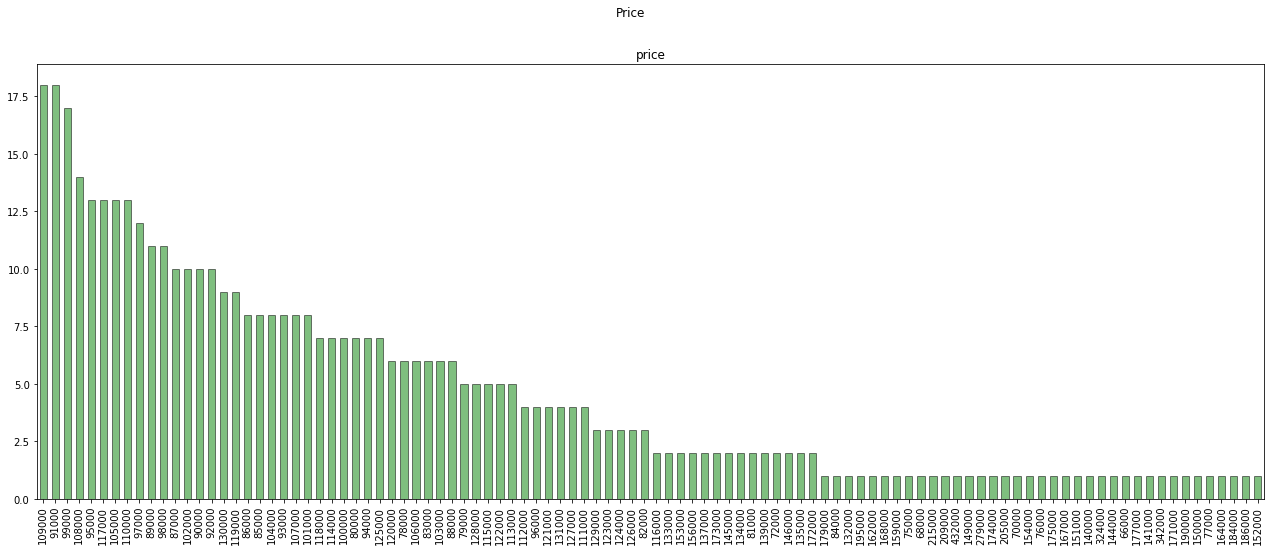

In [97]:

price_counts = df['price'].value_counts()
price_counts.plot(kind='bar', title='Price', figsize=(22,8), width=0.6, alpha=0.5, 
                    color='g', edgecolor='k')


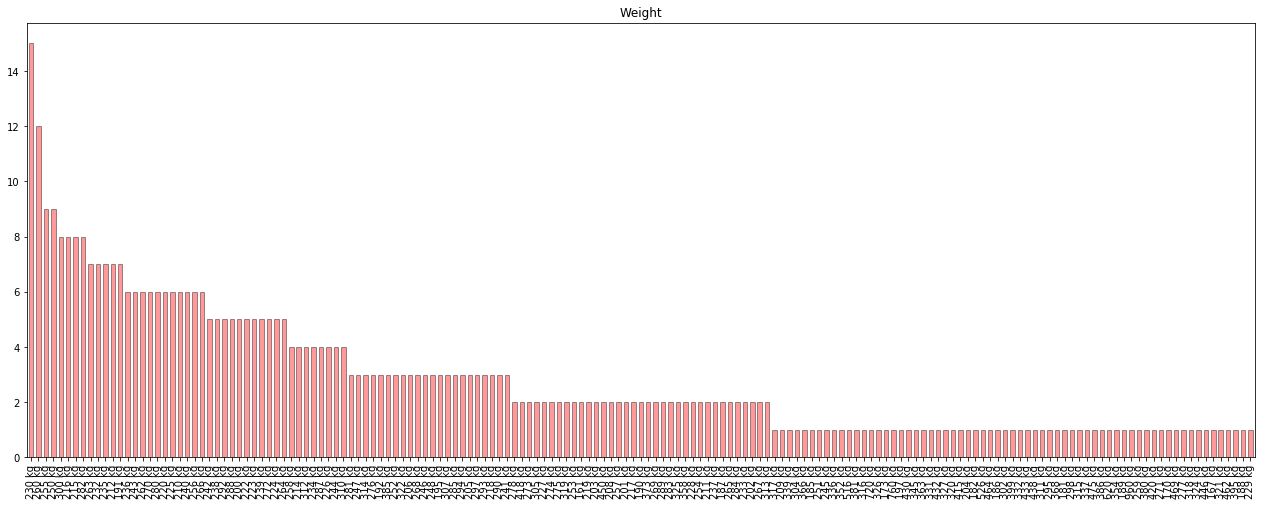

In [108]:
weight_counts = df['weight'].value_counts()
weight_counts.plot(kind='bar', title='Weight', figsize=(22,8), width=0.6, alpha=0.4, 
                    color='r', edgecolor='k')


In [90]:
price_median = df['price'].median()
below_median = df['price'].where(df['price'] < price_median).dropna()
above_median = df['price'].where(df['price'] >= price_median).dropna()
len(below_median), len(above_median)

(230, 236)

In [91]:
price_median

105000.0

In [0]:
breed_counts = df['breed'].value_counts()

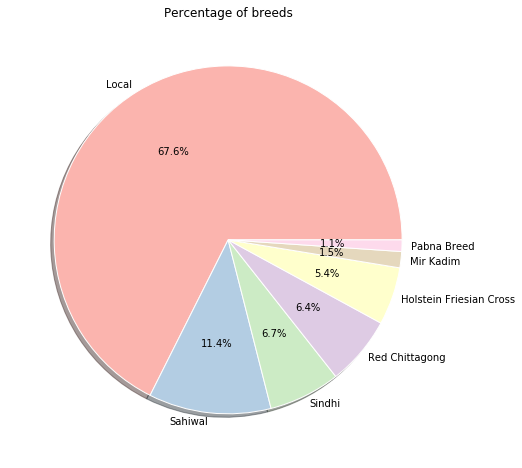

In [93]:
pie_chart(fractions = breed_counts,
          labels = breed_counts.index,
          title = 'Percentage of breeds'
          )

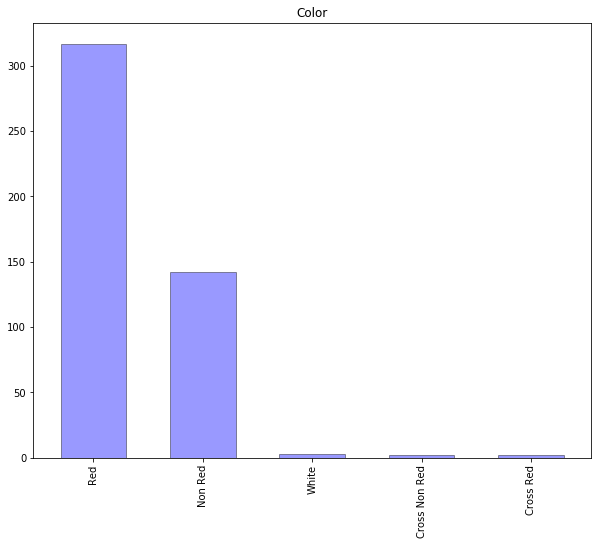

In [94]:
color_counts = df['color'].value_counts()
color_counts.plot(kind='bar', title='Color', figsize=(10,8), width=0.6, alpha=0.4, 
                    color='b', edgecolor='k')

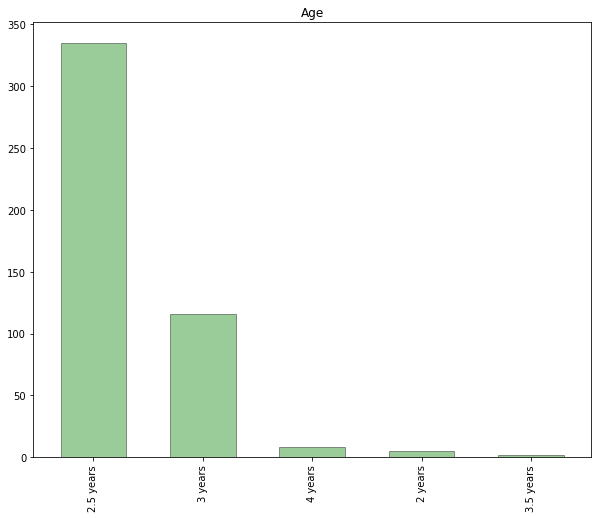

In [95]:
age_counts = df['age'].value_counts()
age_counts.plot(kind='bar', title='Age', figsize=(10,8), width=0.6, alpha=0.4, 
                    color='g', edgecolor='k')